In [35]:
#import Libraries
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np 
import pandas as pd
import sklearn
import seaborn
import os
for dirname, _, filenames in os.walk("../output_data/framingham.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [36]:
# read data farame

df = pd.read_csv("output_data/framingham.csv")
df.head(-1)

,ID,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,2,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,3,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,4,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,5,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234,4235,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,4236,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,4237,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,4238,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [45]:
#Cleaning up DataSet
# Check for Duplication
duplicate_df = df[df.duplicated()]
duplicate_df

# checking for missing values
df.isna().sum()
null = df[df.isna().any(axis=1)]
null

# Dropping all rows with missing data
df = df.dropna()
df.isna().sum()
df.columns

#rename columns
df.rename(columns={'male':'gender'},inplace=True)
df.replace(columns["gender"]={'1':'male'},inplace=True)
df.replace(columns["gender"]={'0':'female'},inplace=True)
# df["Gender"]= df["gender"].replace(1, "Male")
# df["gender"]= df["gender"].replace(0, "Female")

df.head(-1)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-45-4dd2389c8e9f>, line 18)

In [27]:
# Check the data shape by rows vs columns
df.shape

(3658, 17)

In [28]:
# Checking data types and description of all the Parameters after datacleaning step
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 0 to 4239
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               3658 non-null   int64  
 1   gender           3658 non-null   int64  
 2   age              3658 non-null   int64  
 3   education        3658 non-null   float64
 4   currentSmoker    3658 non-null   int64  
 5   cigsPerDay       3658 non-null   float64
 6   BPMeds           3658 non-null   float64
 7   prevalentStroke  3658 non-null   int64  
 8   prevalentHyp     3658 non-null   int64  
 9   diabetes         3658 non-null   int64  
 10  totChol          3658 non-null   float64
 11  sysBP            3658 non-null   float64
 12  diaBP            3658 non-null   float64
 13  BMI              3658 non-null   float64
 14  heartRate        3658 non-null   float64
 15  glucose          3658 non-null   float64
 16  TenYearCHD       3658 non-null   int64  
dtypes: float64(9),

,ID,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,2124.551941,0.443685,49.551941,1.980317,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,1230.833763,0.496886,8.562029,1.022656,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,1.000000,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,1052.250000,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,2141.500000,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,3201.750000,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,4240.000000,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


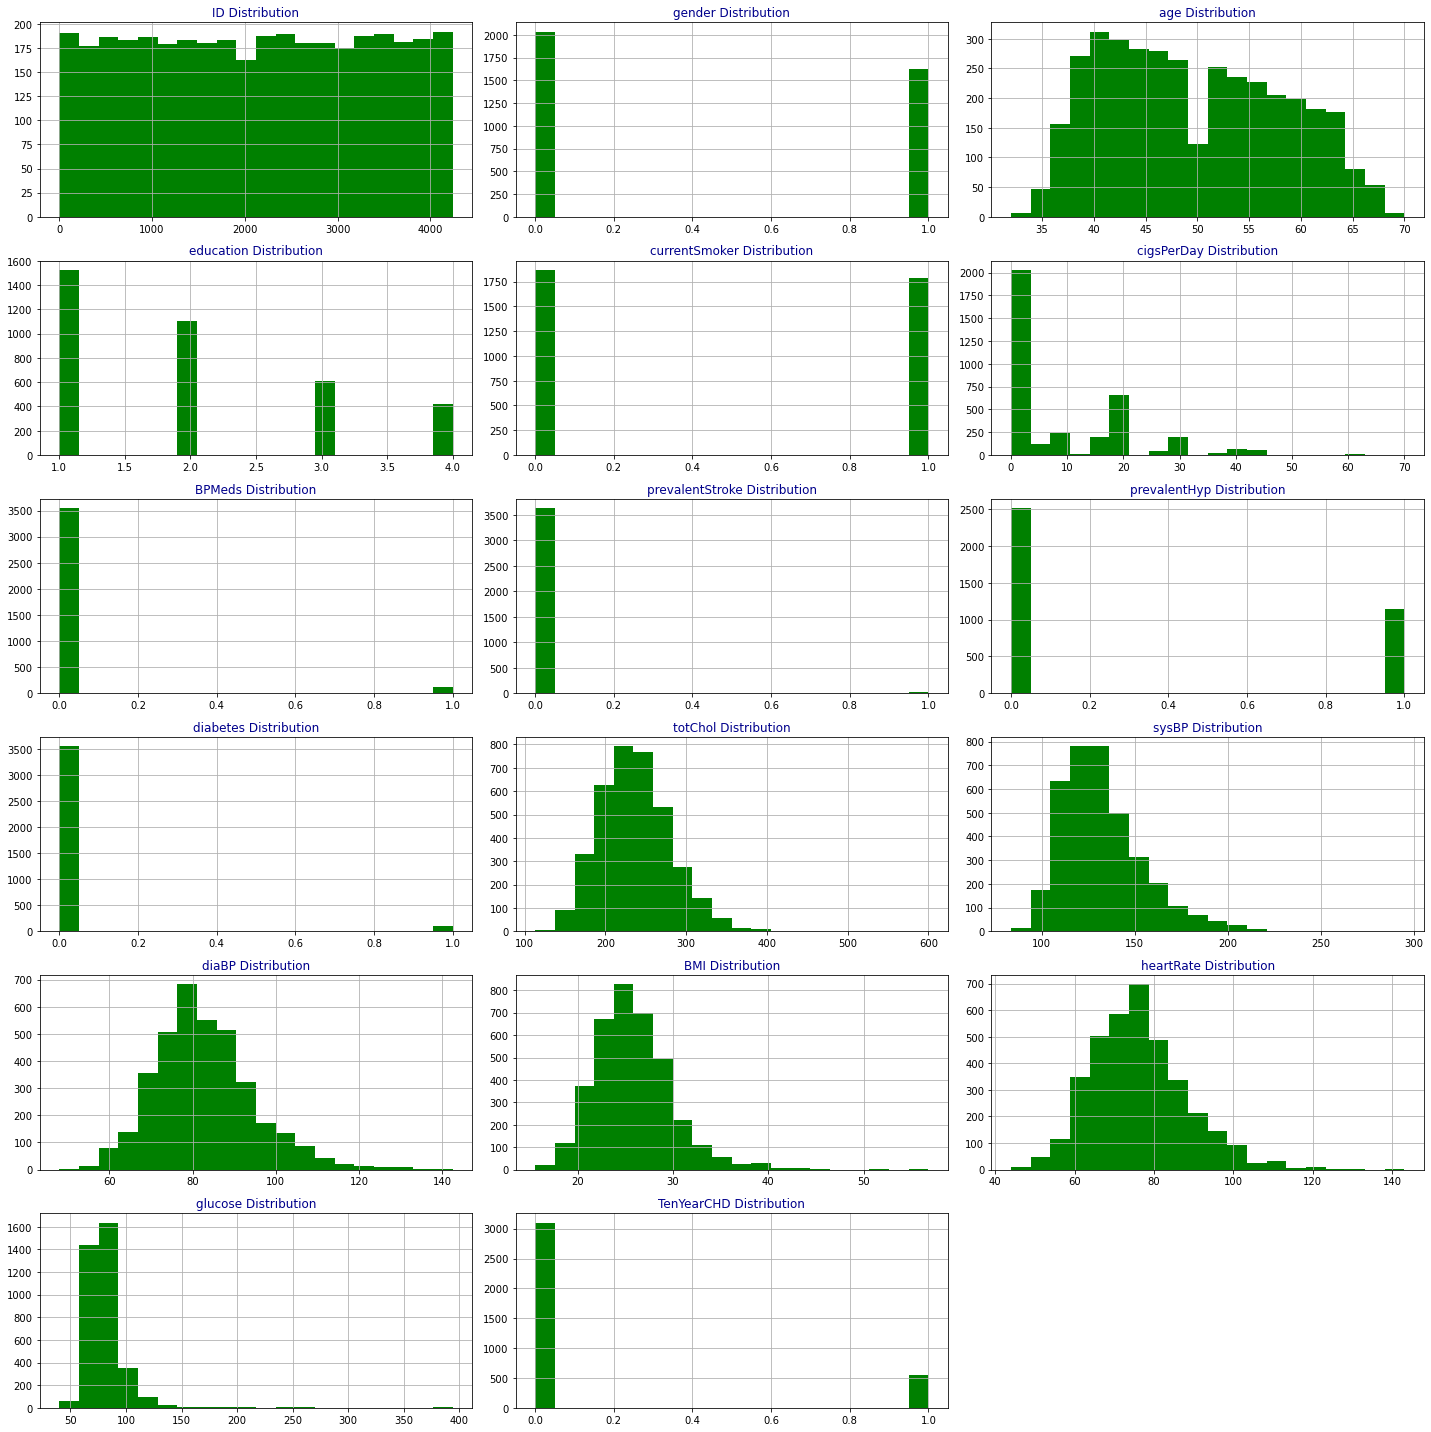

In [29]:
#Exploratory Analysis
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='green')
        ax.set_title(feature+" Distribution",color='DarkBlue')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

In [30]:
# Total number of different genders with CHD
df.TenYearCHD.value_counts()

0    3101
1     557
Name: TenYearCHD, dtype: int64

In [34]:
# ----  Heart Disease counts
a = ggplot(df, aes(`Heart Disease`, fill = `Heart Disease`)) + 
  geom_bar(stat = "count") + scale_fill_manual(values=c('blue70', 'red20')) + 
  labs(title = "Heart Disease") +  theme_bw(base_size = 18) +
  theme(legend.position="bottom")

# ----  Gender   ------
b = ggplot(df, aes(Gender, fill = `Heart Disease`)) + 
  geom_bar(stat = "count", position = "dodge") + 
  scale_fill_manual(values=c('blue70', 'red20')) + 
  labs(title = "Gender", x = "") +  theme_bw(base_size = 18) +
  theme(legend.position="bottom")

options(repr.plot.width=16, repr.plot.height=8)
plot_grid(a,b, ncol = 2, nrow = 1)
#par(mfrow=c(1,1))

SyntaxError: invalid syntax (<ipython-input-34-c2f7aca5c516>, line 2)

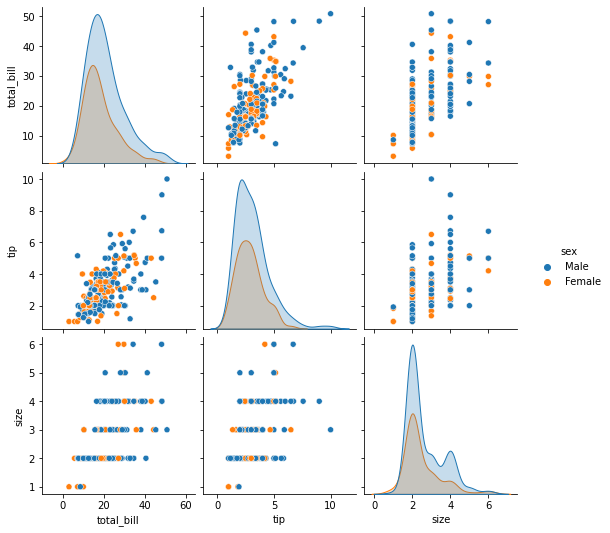

In [42]:
# loading dataset using seaborn
df = seaborn.load_dataset('tips')
# pairplot with hue sex
seaborn.pairplot(df, hue ='sex')
# to show
plt.show()